In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# TWO MAIN DATA TYPES
Series and DataFrame

In [2]:
cars=pd.Series(["BMW","TOYOTA","HONDA"])

In [3]:
cars

0       BMW
1    TOYOTA
2     HONDA
dtype: object

In [4]:
colours=pd.Series(["Red","Green","Blue"])

In [5]:
colours

0      Red
1    Green
2     Blue
dtype: object

Series is 1d whereas DataFrame is 2d

When creating a DataFrame from scratch,it has to be in a dictionary form

In [6]:
a_df=pd.DataFrame({"CarMake ":cars,"Colour":colours})

In [7]:
a_df

,CarMake,Colour
0,BMW,Red
1,TOYOTA,Green
2,HONDA,Blue


In [8]:
car_sales=pd.read_csv("car-sales.csv")

In [9]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [10]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

    Exporting a dataFrame
car_sales.to_csv("another_workout_on.csv",index=False)
Saving a new file with the edited changes of a current csv file
if you do not include the index=False,it will have another index added to the existing one in the previous file

# Describing Data

In [11]:
car_sales.dtypes #Gives the datatypes of the car_sales datasets 

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [12]:
car_columns=car_sales.columns

In [13]:
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [14]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [15]:
car_sales.describe() #Statistical info of the dataset.For only integer values

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [16]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [17]:
car_sales.Doors.sum()

40

In [18]:
car_sales["Doors"].sum() #ctrl shift minus to split cells

40

In [19]:
car_sales.shape

(10, 5)

# VIEWING AND SELECTING DATA

In [20]:
car_sales[car_sales["Make"]=="Honda"]

,Make,Colour,Odometer (KM),Doors,Price
1,Honda,Red,87899,4,"$5,000.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"


In [21]:
pd.crosstab(car_sales.Doors,car_sales.Make) #Checks for compatibility but for two columns.

Make,BMW,Honda,Nissan,Toyota
Doors,,,,
3,0,0,0,1
4,0,3,2,3
5,1,0,0,0


###### To compare two or more,you can use the groupby

In [22]:
car_sales.groupby(["Make"]).sum()

,Odometer (KM),Doors
Make,,
BMW,11179,5
Honda,188335,12
Nissan,244695,8
Toyota,341805,15


In [23]:
car_sales[car_sales.Colour=="White"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [24]:
car_sales_t_w=pd.crosstab(car_sales.Make=="Toyota",car_sales.Doors=="White")

C:\Users\redre\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
car_sales_t_w

Doors,False
Make,
False,6
True,4


In [26]:
#This is to get only white cars.To get White Toyota's,we do it like this
car_sales_toyota=car_sales[car_sales.Make=="Toyota"]
car_sales_toyota_and_white=car_sales_toyota[car_sales_toyota.Colour=="White"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246CD3DF4A8>,
      dtype=object)

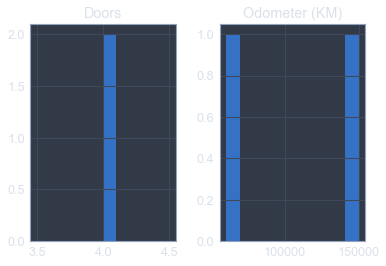

In [27]:
car_sales_toyota_and_white.hist()

In [28]:
#goruping them into their shared properties
car_sales.groupby("Make")["Colour"].unique()

Make
BMW                    [Black]
Honda              [Red, Blue]
Nissan                 [White]
Toyota    [White, Blue, Green]
Name: Colour, dtype: object

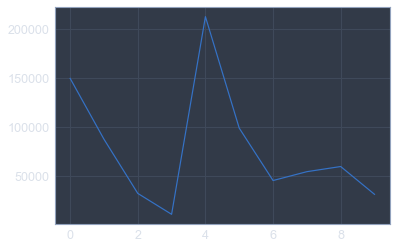

In [29]:
car_sales["Odometer (KM)"].plot()

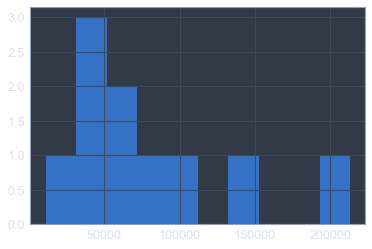

In [30]:
car_sales["Odometer (KM)"].hist()

In [31]:
car_sales.Price=car_sales.Price.str.replace("[\$\,\.]","").astype(int)

In [32]:
car_sales.Price=[int(i/100) for i in car_sales.Price]

In [33]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


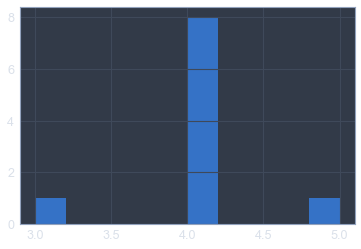

In [34]:
car_sales.Doors.hist()

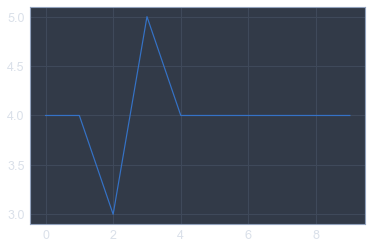

In [35]:
car_sales.Doors.plot()

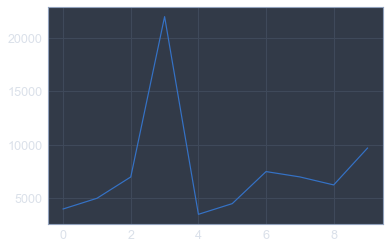

In [36]:
car_sales.Price.plot()

###### MANIPULATING DATA

In [37]:
car_sales.Colour=car_sales.Colour.str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,white,150043,4,4000
1,Honda,red,87899,4,5000
2,Toyota,blue,32549,3,7000
3,BMW,black,11179,5,22000
4,Nissan,white,213095,4,3500
5,Toyota,green,99213,4,4500
6,Honda,blue,45698,4,7500
7,Honda,blue,54738,4,7000
8,Toyota,white,60000,4,6250
9,Nissan,white,31600,4,9700


In [38]:
missing_car_sales=pd.read_csv("missing_car_sales.csv")
missing_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
missing_car_sales.columns=missing_car_sales.columns.str.replace("(KM)?","")
missing_car_sales.columns=missing_car_sales.columns.str.replace("[\(\)]","")
missing_car_sales.columns=missing_car_sales.columns.str.replace(" $","")

In [40]:
missing_car_sales.head(10)

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [41]:
missing_car_small=pd.read_csv("missing_car_small.csv")
missing_car_small.columns=missing_car_small.columns.str.replace("(KM)?","")
missing_car_small.columns=missing_car_small.columns.str.replace("[\(\)]","")
missing_car_small.columns=missing_car_small.columns.str.replace(" $","")
missing_car_small

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,NaN,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,NaN,4.0,23883.0
6,Toyota,Blue,NaN,4.0,NaN
7,Honda,White,NaN,NaN,NaN
8,NaN,White,130538.0,4.0,9374.0


We can simply do it this way to add values to naN

In [42]:
missing_car_small.Odometer.fillna(missing_car_small.Odometer.mean(),inplace=True) #Default is false

In [43]:
missing_car_small

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,138925.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,138925.0,4.0,23883.0
6,Toyota,Blue,138925.0,4.0,NaN
7,Honda,White,138925.0,NaN,NaN
8,NaN,White,130538.0,4.0,9374.0


In [44]:
missing_car_small.dropna(inplace=True)

In [45]:
missing_car_small

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,138925.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,138925.0,4.0,23883.0


Adding a New Column

In [46]:
# Column From Series
seats_column=pd.Series([5,5,5,5,5])
#New Column
car_sales["Seats"]=seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,white,150043,4,4000,5.0
1,Honda,red,87899,4,5000,5.0
2,Toyota,blue,32549,3,7000,5.0
3,BMW,black,11179,5,22000,5.0
4,Nissan,white,213095,4,3500,5.0
5,Toyota,green,99213,4,4500,NaN
6,Honda,blue,45698,4,7500,NaN
7,Honda,blue,54738,4,7000,NaN
8,Toyota,white,60000,4,6250,NaN
9,Nissan,white,31600,4,9700,NaN


In [47]:
car_sales.Seats.fillna(5,inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,white,150043,4,4000,5.0
1,Honda,red,87899,4,5000,5.0
2,Toyota,blue,32549,3,7000,5.0
3,BMW,black,11179,5,22000,5.0
4,Nissan,white,213095,4,3500,5.0
5,Toyota,green,99213,4,4500,5.0
6,Honda,blue,45698,4,7500,5.0
7,Honda,blue,54738,4,7000,5.0
8,Toyota,white,60000,4,6250,5.0
9,Nissan,white,31600,4,9700,5.0


In [48]:
#Column Creation from python list
fuel_economy=[7.5,9.2,5.0,9.6,8.7,8.5,3.4,5.7,2.1,10.4]
#when creating another column with a python list,it has to be of the same length as the main dataframe
car_sales["Fuel_per_100_km"]=fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km
0,Toyota,white,150043,4,4000,5.0,7.5
1,Honda,red,87899,4,5000,5.0,9.2
2,Toyota,blue,32549,3,7000,5.0,5.0
3,BMW,black,11179,5,22000,5.0,9.6
4,Nissan,white,213095,4,3500,5.0,8.7
5,Toyota,green,99213,4,4500,5.0,8.5
6,Honda,blue,45698,4,7500,5.0,3.4
7,Honda,blue,54738,4,7000,5.0,5.7
8,Toyota,white,60000,4,6250,5.0,2.1
9,Nissan,white,31600,4,9700,5.0,10.4


In [49]:
car_sales["Total_Fuel_used"]=car_sales["Odometer (KM)"]/100*car_sales.Fuel_per_100_km
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225
1,Honda,red,87899,4,5000,5.0,9.2,8086.708
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450
3,BMW,black,11179,5,22000,5.0,9.6,1073.184
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400


In [50]:
#Create a Column from a single value
car_sales["Number of Wheels"]=4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4


In [51]:
car_sales["Passed road safety"]=True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,True
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,True
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True


# To drop a column
 car_sales.drop(".....Name of Column Only.....",axis=1)

In [52]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,True
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,True
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True


In [66]:
car_sales["Passed road safety"]=[road for road in car_sales["Fuel_per_100_km"]>4]

In [67]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True


In [68]:
Air_Con=[price for price in car_sales.Price>8000]

In [69]:
Air_Con

[False, False, False, True, False, False, False, False, False, True]

In [70]:
car_sales["Air_Con"]=Air_Con

In [71]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True,False
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True,False
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True,False
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True,True
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True,False
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False,False
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True,False
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True


In [72]:
Is_super=[fuel for fuel in car_sales.Total_Fuel_used>7500]
car_sales['Is_super']=Is_super
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True,False,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True,False,True
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True,False,False
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True,True,False
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True,False,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False,True
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False,False,False
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True,False,False
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False,False,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True,False


###### SHUFFLING A DATAFRAME

In [73]:
car_sales_shuffle=car_sales.sample(frac=1) #Half the data is 0.5

In [74]:
car_sales_shuffle

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False,False,False
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True,False,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False,True
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True,False,False
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True,False,False
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True,False,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True,False,True
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True,True,False
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False,False,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True,False


In [75]:
car_sales_shuffle.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True,False
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False,True


###### RESETTING A SHUFFLED DATAFRAME

In [76]:
car_sales_shuffle.reset_index(inplace=True,drop=True)

In [77]:
car_sales_shuffle

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
0,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False,False,False
1,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True,False,True
2,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False,True
3,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True,False,False
4,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True,False,False
5,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True,False,True
6,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True,False,True
7,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True,True,False
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False,False,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True,False


Applying a function to a column in a dataset

In [78]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
0,Toyota,white,150043,4,4000,5.0,7.5,11253.225,4,True,False,True
1,Honda,red,87899,4,5000,5.0,9.2,8086.708,4,True,False,True
2,Toyota,blue,32549,3,7000,5.0,5.0,1627.450,4,True,False,False
3,BMW,black,11179,5,22000,5.0,9.6,1073.184,4,True,True,False
4,Nissan,white,213095,4,3500,5.0,8.7,18539.265,4,True,False,True
5,Toyota,green,99213,4,4500,5.0,8.5,8433.105,4,True,False,True
6,Honda,blue,45698,4,7500,5.0,3.4,1553.732,4,False,False,False
7,Honda,blue,54738,4,7000,5.0,5.7,3120.066,4,True,False,False
8,Toyota,white,60000,4,6250,5.0,2.1,1260.000,4,False,False,False
9,Nissan,white,31600,4,9700,5.0,10.4,3286.400,4,True,True,False


In [79]:
car_sales["Odometer (KM)"]=car_sales["Odometer (KM)"].apply(lambda x:x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_per_100_km,Total_Fuel_used,Number of Wheels,Passed road safety,Air_Con,Is_super
0,Toyota,white,93776.875,4,4000,5.0,7.5,11253.225,4,True,False,True
1,Honda,red,54936.875,4,5000,5.0,9.2,8086.708,4,True,False,True
2,Toyota,blue,20343.125,3,7000,5.0,5.0,1627.450,4,True,False,False
3,BMW,black,6986.875,5,22000,5.0,9.6,1073.184,4,True,True,False
4,Nissan,white,133184.375,4,3500,5.0,8.7,18539.265,4,True,False,True
5,Toyota,green,62008.125,4,4500,5.0,8.5,8433.105,4,True,False,True
6,Honda,blue,28561.250,4,7500,5.0,3.4,1553.732,4,False,False,False
7,Honda,blue,34211.250,4,7000,5.0,5.7,3120.066,4,True,False,False
8,Toyota,white,37500.000,4,6250,5.0,2.1,1260.000,4,False,False,False
9,Nissan,white,19750.000,4,9700,5.0,10.4,3286.400,4,True,True,False
